# Case Study: Studio GHI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame({
    'X': [100, 200, 300, 400, 500, 550, 600, 650, 700, 750],
    'Y': [250000, 470000, 670000, 850000, 1010000, 1082500, 1150000, 1212500, 1270000, 1322500]
})

In [3]:
x = df['X'].to_numpy().reshape(-1,1)
y = df['Y'].to_numpy().reshape(-1,1)

model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

In [4]:
model.intercept_

array([149130.43478261])

In [5]:
model.coef_

array([[1641.30434783]])

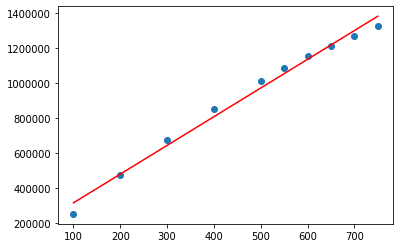

In [6]:
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')
plt.show()

According to sklearn, the line of best fit is:

$\Large{y\ =\ 149,130.435\ +\ 1,641.30x}$

This means that this straight line function has 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

In [8]:
y2 = y.reshape(1,-1).flatten()

In [9]:
# model2 = GradientDescent(max_iter=10_000_000).fit(x2, model.predict(x2).reshape(1,-1).flatten())

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', SGDRegressor(max_iter=100_000_000))
])
model2 = pipeline.fit(x, y2)

y_pred2 = model2.predict(x)

In [10]:
model2.named_steps['linear'].coef_

array([485297.7254646 , 321863.38384158, -43098.20896636])

In [11]:
model2.named_steps['linear'].intercept_

array([486524.43419961])

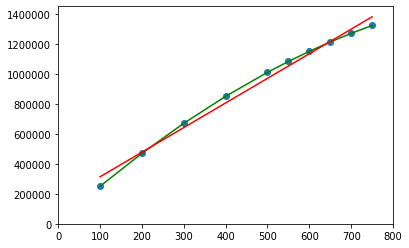

In [12]:
plt.scatter(x, y)
plt.plot(x, y_pred2, color='green')
plt.plot(x, y_pred, color='red')
plt.axis([0, 800, 0, 1_450_000])
plt.show()